In [4]:
using NPZ
using PyPlot, Statistics, Distributions
include("../src/function/extended_delta_map.jl")
include("../src/function/r_estimate_extended.jl")
include("../src/function/set_data_model.jl")
# set parameters
freq_bands = [40, 60, 140]
#freq_bands = [40, 50, 60, 68, 78, 89, 100, 119]
#freq_bands = [40, 50, 60, 68, 78, 89, 100, 119, 140, 166, 195, 235, 280, 337, 402]; #GHz
which_model = "s1"
r_input = 0.01
seed = 2
nside = 4
num_I = 2  
cov_mat_scal = npzread("../covariance_matrix/smoothing_cov_mat_scal.npy")
cov_mat_tens = npzread("../covariance_matrix/smoothing_cov_mat_tens.npy")
mask_path = "../mask_p06_Nside4.v2.fits"
mask = hp.read_map(mask_path);
N⁻¹_set = Matrix{Float64}[]  
m_set = Vector{Float64}[]  
r_est = 0.5

# definite SetParams and FitParams struct
set_params = SetParams(freq_bands, which_model, r_input, seed, nside, num_I, cov_mat_scal, cov_mat_tens, mask, m_set, N⁻¹_set)
fit_params = FitParams(-3, 1.5, 20.1, r_est);

In [5]:
set_num_I!(set_params)
set_N⁻¹!(set_params)
set_m_vec!(set_params);

In [7]:
@time iterative_minimization(set_params, fit_params)

Iteration 1: r = 0.011950071390263828, Likelihood = -5.455271587746913e6
delta_like = 1.0005455271587748e10
delta_r = 0.0
Iteration 2: r = 0.011950071390263828, Likelihood = -5.455271587746913e6
delta_like = 0.0
delta_r = 0.0
  3.487419 seconds (66.38 k allocations: 11.323 GiB, 10.82% gc time)


In [8]:
num_seeds = 10
@time r_dis, beta_s_dis, beta_d_dis, T_d_dis = estimate_r_distribution(set_params, fit_params, num_seeds)

Iteration 1: r = 0.005022264755692063, Likelihood = -5.186350250168369e6
delta_like = 1.0005186350250168e10
delta_r = 0.006927806634571765
Iteration 2: r = 0.004728823190248699, Likelihood = -5.1863108899564305e6
delta_like = 39.360211938619614
delta_r = 0.0002934415654433642
Iteration 3: r = 0.004715842691627059, Likelihood = -5.186307900267997e6
delta_like = 2.9896884337067604
delta_r = 1.2980498621639747e-5
Iteration 4: r = 0.004715842691627059, Likelihood = -5.1863078939745305e6
delta_like = 0.006293466314673424
delta_r = 0.0
Iteration 1: r = 0.011950071390263828, Likelihood = -5.455271587746913e6
delta_like = 1.0005455271587748e10
delta_r = 0.0
Iteration 2: r = 0.011950071390263828, Likelihood = -5.455271587746913e6
delta_like = 0.0
delta_r = 0.0
Iteration 1: r = 0.007510850459305385, Likelihood = -5.01812795933936e6
delta_like = 1.000501812795934e10
delta_r = 0.004439220930958443
Iteration 2: r = 0.00714364729527639, Likelihood = -5.018096889206016e6
delta_like = 31.0701333433389

(Any[0.004715842691627059, 0.011950071390263828, 0.0071084704804552645, 0.012577408423018577, 0.012244511858387985, 0.01155578336587737, 0.008396884025465401, 0.017126939248695627, 0.007654438722339063, 0.008404732441484875], Any[-3.2292699191804117, -3.1558437212404593, -3.2058464290122233, -3.255443080961723, -3.026236202694994, -3.1822036484629885, -3.123824915658027, -3.216911388230239, -3.192644566271761, -2.991927615880798], Any[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5], Any[20.1, 20.1, 20.1, 20.1, 20.1, 20.1, 20.1, 20.1, 20.1, 20.1])

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


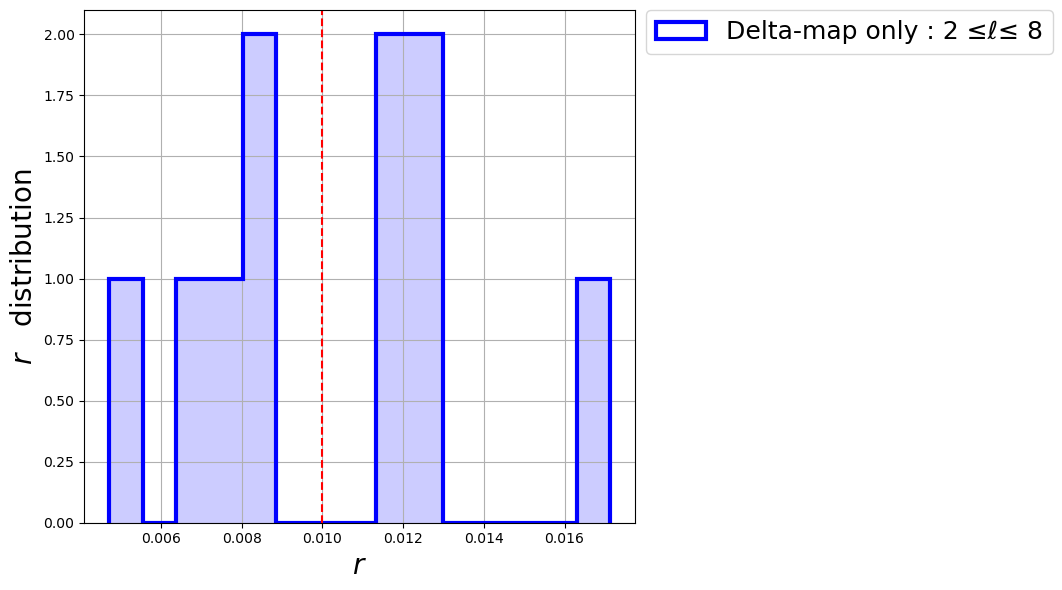

In [9]:
figure(figsize=(8, 6))
hist(r_dis, bins=15, alpha=0.2, color="blue", histtype="stepfilled")
hist(r_dis, bins = 15, alpha = 1., edgecolor = "blue", label = "Delta-map only : 2 ≤ℓ≤ 8", histtype = "step", linewidth = 3)
axvline(x = r_input, color = "red", linestyle = "--")
xlabel(L"$r$", fontsize=20)
ylabel(L"$r\quad$distribution", fontsize=20) 
plt.grid(true)
legend(loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0., fontsize="18")
tight_layout()
subplots_adjust(right=0.8)
show()

In [10]:
mean(r_dis)

0.010173508264761506

In [11]:
mean(beta_s_dis)

-3.1580151487593624